In [2]:
import pandas as pd

df = pd.read_csv('/home/toefl/K/MCTS/dataset/train.csv')

In [5]:
df['AdvantageP1'].nunique()

97

In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,Properties,Format,Time,Discrete,Realtime,Turns,Alternating,Simultaneous,Stochastic,...,Then,ForEachPiece,DoLudeme,Trigger,PlayoutsPerSecond,MovesPerSecond,num_wins_agent1,num_draws_agent1,num_losses_agent1,utility_agent1
Id,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.082242,...,0.030840,-0.020395,0.001320,-0.014770,0.035845,-0.027790,-0.012564,0.059317,-0.040535,0.015464
Properties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discrete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MovesPerSecond,-0.027790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.123085,...,-0.453033,0.121099,-0.370971,-0.062054,0.569310,1.000000,-0.006102,-0.000747,0.004158,-0.005987
num_wins_agent1,-0.012564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026049,...,-0.023047,0.004871,0.000198,-0.020390,-0.046389,-0.006102,1.000000,-0.444640,-0.587193,0.887889
num_draws_agent1,0.059317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.075996,...,0.010181,-0.008809,-0.039491,-0.044932,0.066060,-0.000747,-0.444640,1.000000,-0.409875,-0.024477
num_losses_agent1,-0.040535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051294,...,0.018282,0.001893,0.038522,0.061520,-0.011915,0.004158,-0.587193,-0.409875,1.000000,-0.884773


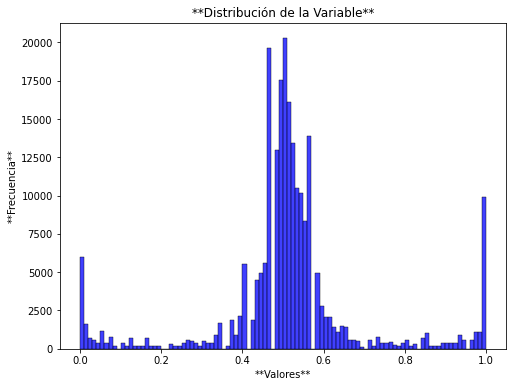

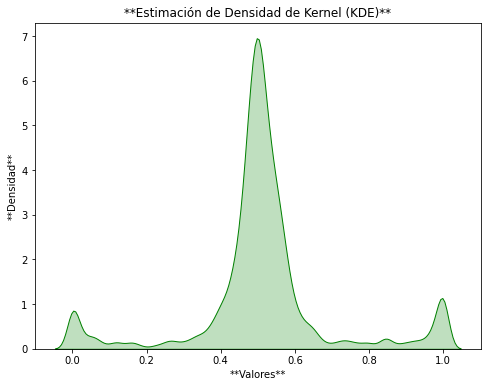

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['AdvantageP1'], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['AdvantageP1'], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

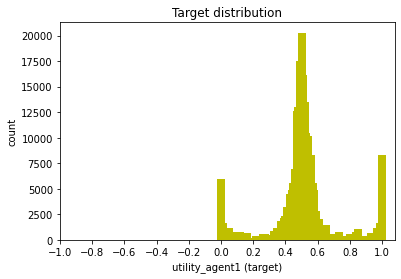

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(*np.unique(df['AdvantageP1'].to_numpy(), return_counts=True), width=0.05, color='y')
plt.xlabel('utility_agent1 (target)')
plt.ylabel('count')
plt.xticks(np.linspace(-1, 1, 11))
plt.title('Target distribution')
plt.show()

In [48]:
df = df[df["LudRules"].apply(lambda x: "start" in x)]

In [50]:
df["LudRules"].tolist()[10]

'(game "1D Chess" (players 2) (equipment { (board (rectangle 1 8)) (piece "Rook" Each (move Slide Orthogonal (to if:(is Enemy (who at:(to))) (apply (remove (to)))) ) ) (piece "King" Each (move Step (to if:(not (is Friend (who at:(to)))) (apply (if (is Enemy (who at:(to))) (remove (to)))) ) ) ) (piece "Knight" Each (move Leap { { F F } } (to if:(not (is Friend (who at:(to)))) (apply (if (is Enemy (who at:(to))) (remove (to)))) ) ) ) } ) (rules (start { (place "Rook1" coord:"C1") (place "Knight1" coord:"B1") (place "King1" coord:"A1") (place "Rook2" coord:"F1") (place "Knight2" coord:"G1") (place "King2" coord:"H1") } ) (play (do (forEach Piece) ifAfterwards:(not (is Threatened (id "King" Mover))) ) ) (end { (if (and (is Threatened (id "King" Next)) (not (can Move (do (forEach Piece Next) ifAfterwards:(not (is Threatened (id "King" Next)) ) ) ) ) ) (result Mover Win) ) (if (or (no Moves Mover) (= (counter) 100)) (result Mover Draw) ) } ) ) )'

In [21]:
df.value_counts()

Series([], dtype: int64)

In [35]:
f = pd.read_csv('/home/toefl/K/MCTS/dataset/feature_importance.csv')

In [36]:
print([column for column in f.feature.tolist() if 'src' in column])

['src_AdvantageP1', 'src_p2_selection', 'src_AdvantageBalanceRatio', 'src_p2_playout', 'src_p2_agent', 'src_selection_exploration', 'src_p2_exploration', 'src_AdvantageTimeImpact', 'src_exploration_selection', 'src_OutcomeUniformityAdvantageP1', 'src_p1_playout', 'src_p1_selection', 'src_selection_playout', 'src_playout_playout', 'src_exploration_playout', 'src_selection_selection', 'src_selection_bounds', 'src_playout_bounds', 'src_p1_exploration', 'src_playout_selection', 'src_exploration_bounds', 'src_playout_exploration', 'src_bounds_selection', 'src_p1_agent', 'src_exploration_exploration', 'src_p2_bounds', 'src_bounds_playout', 'src_bounds_exploration', 'src_agent_agent', 'src_playout_agent', 'src_agent_playout', 'src_exploration_agent', 'src_bounds_agent', 'src_agent_exploration', 'src_agent_selection', 'src_agent_bounds', 'src_p1_bounds', 'src_selection_agent', 'src_bounds_bounds']


In [52]:
f[f["feature"] == "src_AdvantageP1"]

,Unnamed: 0,feature,importance
457,587,src_AdvantageP1,0.019873


In [3]:
f

NameError: name 'f' is not defined

In [18]:
import pickle
with open('catcols.pickle', 'rb') as file:
    catcols = pickle.load(file)

In [19]:
print(catcols)

['src_p1_selection', 'src_p1_exploration', 'src_p1_playout', 'src_p1_bounds', 'src_p2_selection', 'src_p2_exploration', 'src_p2_playout', 'src_p2_bounds', 'src_agent1', 'src_agent2']


In [ ]:
            # X_train = X_train.rename(columns={"src_Balance": "Balance"})
            # X_valid_src = X_valid_src.rename(columns={"src_Balance": "Balance"})
            # X_valid_tta = X_valid_tta.rename(columns={"src_Balance": "Balance"})

In [10]:
f.shape

(598, 2)

In [13]:
len(f[f["importance"] < 0.01])

424

In [15]:
f[f["importance"] < 0.01]["feature"].tolist()

['Drawishness',
 'NoMovesEndFrequency',
 'MoveDistanceChangeSign',
 'ScoreDifferenceChangeSign',
 'Comparison',
 'SwapPlayersDecisionFrequency',
 'ForEachPiece',
 'NumPhasesBoard',
 'PieceNumberMaxIncrease',
 'SowCW',
 'StepDecisionToFriendFrequency',
 'ConnectionEndFrequency',
 'Cell',
 'SetNextPlayer',
 'Equal',
 'NumConcaveCorners',
 'HopDecisionFrequency',
 'SowSkip',
 'ReplacementCaptureFrequency',
 'Negation',
 'NoMovesDraw',
 'ScoreDifferenceVariance',
 'SlideDecisionFrequency',
 'SlideDecisionToEnemyFrequency',
 'NoMovesNext',
 'LesserThanOrEqual',
 'SlideDecisionToFriendFrequency',
 'Complement',
 'Arithmetic',
 'NoMovesLossFrequency',
 'NoTargetPieceEndFrequency',
 'MoveDistanceChangeLineBestFit',
 'PromotionEffectFrequency',
 'Algorithmics',
 'GoStyle',
 'Capture',
 'ScoreDifferenceAverage',
 'AddEffectFrequency',
 'Then',
 'LeapDecisionFrequency',
 'ScoreDifferenceMaxDecrease',
 'SpaceEnd',
 'DiscComponent',
 'ScoreDifferenceChangeLineBestFit',
 'PieceCount',
 'ScoringWinFr

In [30]:
f.head(50)

,Unnamed: 0,feature,importance
0,597,src_AdvantageP1,9.871521
1,424,Balance,4.842335
2,591,src_p2_selection,4.008353
3,612,src_AdvantageBalanceRatio,3.788492
4,593,src_p2_playout,3.188467
5,596,src_p2_agent,3.068649
6,622,src_selection_exploration,2.258221
7,592,src_p2_exploration,1.821703
8,613,src_AdvantageTimeImpact,1.776630
9,417,DurationTurnsNotTimeouts,1.675810


In [15]:
df.shape

(233234, 814)

In [12]:
dfs = df.copy()

In [13]:
dft = dfs[(dfs["GameRulesetName"] == df["GameRulesetName"]) & (dfs["agent1"] == df["agent2"]) & (dfs["agent2"] == df["agent1"])]

In [14]:
dft.shape

(0, 814)

In [12]:

d1 = df["AdvantageP1"]
d2 = df["MoveDistanceMaxDecrease"]
d1.groupby(d2).rank(ascending=True, pct=True).nunique()

390

In [14]:
import pickle

with open('feature.pickle', 'rb') as file:
    feature = pickle.load(file)

In [16]:
feature[0].name

'GroupByThenRank'

In [27]:
import polars as pl

sub = pl.read_parquet('/home/toefl/K/MCTS/submission.parquet')

In [28]:
sub

Id,utility_agent1
i64,f64
233234,0.179138
233236,0.030618
233235,-0.188421


In [18]:
sub

Id,utility_agent1
i64,f64
233234,0.185311
233236,0.014517
233235,-0.185311


In [6]:
sub

Id,utility_agent1
i64,f64
233234,0.023419
233235,-0.028186
233236,0.00731


In [4]:
sub

Id,utility_agent1
i64,f64
233234,0.191369
233236,0.023886
233235,-0.191369


In [7]:
df["agent1"].nunique()

72

In [11]:
df["agent"] = df["agent1"] + "_" + df["agent2"] 

In [14]:
df[["agent", "utility_agent1"]].groupby("agent").mean().sort_values(by="utility_agent1").to_csv('dataset/avg.csv')

In [15]:
df[["GameRulesetName", "utility_agent1"]].groupby("GameRulesetName").mean().sort_values(by="utility_agent1").to_csv('dataset/avg_game.csv')

In [26]:
oof_labels = artifacts["catboost"]["oof_labels"]
oof_preds = artifacts["catboost"]["oof_preds"]

oof_preds_fixed = oof_preds.copy()
oof_preds_fixed[df["GameTreeComplexity"] == 0] = 2 * df[df["GameTreeComplexity"] == 0]["src_AdvantageP1"] - 1

In [25]:
oof_labels[:5]

array([-0.46666667, -0.33333333, -0.06666667, -0.33333333, -0.33333333])

In [28]:
mean_squared_error(oof_labels, oof_preds_fixed, squared=False)

0.40186378136362766

In [20]:
import pickle
with open('solver_checkpoint.pickle', 'rb') as file:
    data = pickle.load(file)

In [26]:
from sklearn.metrics import mean_squared_error

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Generar predicciones y etiquetas aleatorias
np.random.seed(42)  # para resultados reproducibles
predicciones = np.random.rand(1000) / 2 + 1  # 10 predicciones aleatorias
etiquetas = np.random.rand(1000) / 2 + 1    # 10 etiquetas aleatorias

# Calcular el RMSE
mse = mean_squared_error(etiquetas, predicciones)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

mse = mean_squared_error(etiquetas * 2 - 1, predicciones* 2 - 1)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 0.20361155521938443
RMSE: 0.40722311043876885


In [25]:
data["catboost"].keys()

dict_keys(['features', 'oof_score', 'models'])

In [22]:
oof_labels = data["catboost"]["oof_labels"]
oof_preds = data["catboost"]["oof_preds"]

KeyError: 'oof_label'

In [10]:
slc = df[df["GameTreeComplexity"] == 0][["AdvantageP1", "utility_agent1"]]
mse = abs(slc["AdvantageP1"] - (slc["utility_agent1"] + 1) / 2)

In [13]:
mse.mean()

0.0384825327510917

In [10]:
for f in df.columns.tolist():
    if 'src' in f:
        print(f)

In [1]:
df["utility_agent1"].nunique()

NameError: name 'df' is not defined

In [13]:
import pickle

with open('feature.pickle', 'rb') as file:
    feature = pickle.load(file)

In [15]:
print(len(feature))

15924


In [19]:
import sys
sys.path.append('/home/toefl/K/MCTS/dataset/')
import kaggle_evaluation.mcts_inference_server

In [ ]:
    self.model_paths=[]
    self.tfidf_paths=[]

    def train_model(self,):

        X_train=self.CV_feats(X_train,mode='train',model_name=model_name,fold=fold)
        X_valid=self.CV_feats(X_valid,mode='test',model_name=model_name,fold=fold)


    def infer_model(self,test):
        test=self.FE(test,mode='test')
        test.drop(['GameRulesetName'],axis=1,inplace=True)
        test_copy=self.CV_feats(test.copy(),mode='test',model_name=model_name,fold=fold)

In [ ]:
        # m = {}
        # for i, u in enumerate(Y.unique()):
        #     m[u] = i
        # Y = Y.map(m)

In [ ]:
        # # Custom features.

        # df = df.with_columns([
        #     (pl.col('PlayoutsPerSecond') / (pl.col('MovesPerSecond') + 1e-15)).alias('Playouts/Moves'),
        #     (pl.col('MovesPerSecond') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('EfficiencyPerPlayout'),
        #     (pl.col('DurationActions') / (pl.col('DurationTurnsStdDev') + 1e-15)).alias('TurnsDurationEfficiency'),
        #     (pl.col('DurationActions') / (pl.col('MovesPerSecond') + 1e-15)).alias('ActionTimeEfficiency'),
        #     (pl.col('DurationTurnsStdDev') / (pl.col('DurationActions') + 1e-15)).alias('StandardizedTurnsEfficiency'),
        #     (pl.col('DurationActions') / (pl.col('StateTreeComplexity') + 1e-15)).alias('DurationToComplexityRatio'),
        #     (pl.col('GameTreeComplexity') / (pl.col('StateTreeComplexity') + 1e-15)).alias('NormalizedGameTreeComplexity'),
        #     (pl.col('Balance') * pl.col('GameTreeComplexity')).alias('ComplexityBalanceInteraction'),
        #     (pl.col('StateTreeComplexity') + pl.col('GameTreeComplexity')).alias('OverallComplexity'),
        #     (pl.col('GameTreeComplexity') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('ComplexityPerPlayout'),
        #     (pl.col('DurationTurnsNotTimeouts') / (pl.col('MovesPerSecond') + 1e-15)).alias('TurnsNotTimeouts/Moves'),
        #     (pl.col('Timeouts') / (pl.col('DurationActions') + 1e-15)).alias('Timeouts/DurationActions'),
        #     (pl.col('StepDecisionToEnemy') + pl.col('SlideDecisionToEnemy') + pl.col('HopDecisionMoreThanOne')).alias('ComplexDecisionRatio'),
        #     (pl.col('StepDecisionToEnemy') + 
        #      pl.col('HopDecisionEnemyToEnemy') + 
        #      pl.col('HopDecisionFriendToEnemy') + 
        #      pl.col('SlideDecisionToEnemy')).alias('AggressiveActionsRatio'),

        #     (pl.col('src_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('src_AdvantageBalanceRatio'),
        #     (pl.col('src_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('src_AdvantageTimeImpact'),
        #     (pl.col('OutcomeUniformity') / (pl.col('src_AdvantageP1') + 1e-15)).alias('src_OutcomeUniformity/AdvantageP1'),

        #     (pl.col('tta_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('tta_AdvantageBalanceRatio'),
        #     (pl.col('tta_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('tta_AdvantageTimeImpact'),
        #     (pl.col('OutcomeUniformity') / (pl.col('tta_AdvantageP1') + 1e-15)).alias('tta_OutcomeUniformity/AdvantageP1'),
        # ])

In [ ]:
# Y_train = Y_train.astype(np.float64)
#             X[src_columns].to_csv('Xtrain.csv')
#             Y.to_csv('Ytrain.csv')

#             print('here')

#             ofe = OpenFE()
#             features = ofe.fit(data=X_train, label=Y_train.astype(np.float64))
#             print(features)
#             train_x, _ = transform(X_train, X_valid, features)
#             train_x.to_csv('features.csv')

In [ ]:
    #   def ARI(txt):
    #         characters = len(txt)
    #         words = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         sentence = len(re.split('\\.|\\?|\\!', txt))
    #         ari_score = 4.71*(characters/words)+0.5*(words/sentence)-21.43
    #         return ari_score

    #     def McAlpine_EFLAW(txt):
    #         W = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         S = len(re.split('\\.|\\?|\\!', txt))
    #         mcalpine_eflaw_score = (W+S*W)/S
    #         return mcalpine_eflaw_score
        
    #     def CLRI(txt):
    #         characters = len(txt)
    #         words = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         sentence = len(re.split('\\.|\\?|\\!', txt))
    #         L = 100*characters/words
    #         S = 100*sentence/words
    #         clri_score = 0.0588*L-0.296*S-15.8
    #         return clri_score
        
    #     def drop_gamename(rule):
    #         rule = rule[len('(game "'):]
    #         for i in range(len(rule)):
    #             if rule[i] == '"':
    #                 return rule[i+1:]
                
    #     def get_player(rule):
    #         player = ''
    #         stack = []
    #         for i in range(len(rule)):
    #             player += rule[i]
    #             if rule[i] in ['(', '{']:
    #                 stack.append(rule[i])
    #             elif rule[i] in [')', '}']:
    #                 stack = stack[:-1]
    #                 if len(stack) == 0:
    #                     return player

In [ ]:
# Player position (positive / negative).

        # total_agent = ['MCTS-ProgressiveHistory-0.1-MAST-false', 'MCTS-ProgressiveHistory-0.1-MAST-true', 'MCTS-ProgressiveHistory-0.1-NST-false', 'MCTS-ProgressiveHistory-0.1-NST-true', 'MCTS-ProgressiveHistory-0.1-Random200-false', 'MCTS-ProgressiveHistory-0.1-Random200-true', 'MCTS-ProgressiveHistory-0.6-MAST-false', 'MCTS-ProgressiveHistory-0.6-MAST-true', 'MCTS-ProgressiveHistory-0.6-NST-false', 'MCTS-ProgressiveHistory-0.6-NST-true', 'MCTS-ProgressiveHistory-0.6-Random200-false', 'MCTS-ProgressiveHistory-0.6-Random200-true', 'MCTS-ProgressiveHistory-1.41421356237-MAST-false', 'MCTS-ProgressiveHistory-1.41421356237-MAST-true', 'MCTS-ProgressiveHistory-1.41421356237-NST-false', 'MCTS-ProgressiveHistory-1.41421356237-NST-true', 'MCTS-ProgressiveHistory-1.41421356237-Random200-false', 'MCTS-ProgressiveHistory-1.41421356237-Random200-true', 'MCTS-UCB1-0.1-MAST-false', 'MCTS-UCB1-0.1-MAST-true', 'MCTS-UCB1-0.1-NST-false', 'MCTS-UCB1-0.1-NST-true', 'MCTS-UCB1-0.1-Random200-false', 'MCTS-UCB1-0.1-Random200-true', 'MCTS-UCB1-0.6-MAST-false', 'MCTS-UCB1-0.6-MAST-true', 'MCTS-UCB1-0.6-NST-false', 'MCTS-UCB1-0.6-NST-true', 'MCTS-UCB1-0.6-Random200-false', 'MCTS-UCB1-0.6-Random200-true', 'MCTS-UCB1-1.41421356237-MAST-false', 'MCTS-UCB1-1.41421356237-MAST-true', 'MCTS-UCB1-1.41421356237-NST-false', 'MCTS-UCB1-1.41421356237-NST-true', 'MCTS-UCB1-1.41421356237-Random200-false', 'MCTS-UCB1-1.41421356237-Random200-true', 'MCTS-UCB1GRAVE-0.1-MAST-false', 'MCTS-UCB1GRAVE-0.1-MAST-true', 'MCTS-UCB1GRAVE-0.1-NST-false', 'MCTS-UCB1GRAVE-0.1-NST-true', 'MCTS-UCB1GRAVE-0.1-Random200-false', 'MCTS-UCB1GRAVE-0.1-Random200-true', 'MCTS-UCB1GRAVE-0.6-MAST-false', 'MCTS-UCB1GRAVE-0.6-MAST-true', 'MCTS-UCB1GRAVE-0.6-NST-false', 'MCTS-UCB1GRAVE-0.6-NST-true', 'MCTS-UCB1GRAVE-0.6-Random200-false', 'MCTS-UCB1GRAVE-0.6-Random200-true', 'MCTS-UCB1GRAVE-1.41421356237-MAST-false', 'MCTS-UCB1GRAVE-1.41421356237-MAST-true', 'MCTS-UCB1GRAVE-1.41421356237-NST-false', 'MCTS-UCB1GRAVE-1.41421356237-NST-true', 'MCTS-UCB1GRAVE-1.41421356237-Random200-false', 'MCTS-UCB1GRAVE-1.41421356237-Random200-true', 'MCTS-UCB1Tuned-0.1-MAST-false', 'MCTS-UCB1Tuned-0.1-MAST-true', 'MCTS-UCB1Tuned-0.1-NST-false', 'MCTS-UCB1Tuned-0.1-NST-true', 'MCTS-UCB1Tuned-0.1-Random200-false', 'MCTS-UCB1Tuned-0.1-Random200-true', 'MCTS-UCB1Tuned-0.6-MAST-false', 'MCTS-UCB1Tuned-0.6-MAST-true', 'MCTS-UCB1Tuned-0.6-NST-false', 'MCTS-UCB1Tuned-0.6-NST-true', 'MCTS-UCB1Tuned-0.6-Random200-false', 'MCTS-UCB1Tuned-0.6-Random200-true', 'MCTS-UCB1Tuned-1.41421356237-MAST-false', 'MCTS-UCB1Tuned-1.41421356237-MAST-true', 'MCTS-UCB1Tuned-1.41421356237-NST-false', 'MCTS-UCB1Tuned-1.41421356237-NST-true', 'MCTS-UCB1Tuned-1.41421356237-Random200-false', 'MCTS-UCB1Tuned-1.41421356237-Random200-true']
        
        # agent1, agent2 = df['src_p1_agent'].values, df['src_p2_agent'].values
        # for i in range(len(total_agent)):
        #     value = np.zeros(len(df))
        #     for j in range(len(df)):
        #         if agent1[j] == total_agent[i]:
        #             value[j] += 1
        #         elif agent2[j] == total_agent[i]:
        #             value[j] -= 1
        #     df[f'src_agent_{total_agent[i]}'] = value
        
        # agent1, agent2 = df['tta_p1_agent'].values, df['tta_p2_agent'].values
        # for i in range(len(total_agent)):
        #     value = np.zeros(len(df))
        #     for j in range(len(df)):
        #         if agent1[j] == total_agent[i]:
        #             value[j] += 1
        #         elif agent2[j] == total_agent[i]:
        #             value[j] -= 1
        #     df[f'tta_agent_{total_agent[i]}'] = value

        # # One-hot encoding.

        # onehot_cols = [['NumOffDiagonalDirections', [0.0, 4.82, 2.0, 5.18, 3.08, 0.06]], ['NumLayers', [1, 0, 4, 5]], ['NumPhasesBoard', [3, 2, 1, 5, 4]], ['NumContainers', [1, 4, 3, 2]], ['NumDice', [0, 2, 1, 4, 6, 3, 5, 7]], ['ProposeDecisionFrequency', [0.0, 0.05, 0.01]], ['PromotionDecisionFrequency', [0.0, 0.01, 0.03, 0.02, 0.11, 0.05, 0.04]], ['SlideDecisionToFriendFrequency', [0.0, 0.19, 0.06]], ['LeapDecisionToEnemyFrequency', [0.0, 0.04, 0.01, 0.02, 0.07, 0.03, 0.14, 0.08]], ['HopDecisionFriendToFriendFrequency', [0.0, 0.13, 0.09]], ['HopDecisionEnemyToEnemyFrequency', [0.0, 0.01, 0.2, 0.03]], ['HopDecisionFriendToEnemyFrequency', [0.0, 0.01, 0.09, 0.25, 0.02]], ['FromToDecisionFrequency', [0.0, 0.38, 1.0, 0.31, 0.94, 0.67]], ['ProposeEffectFrequency', [0.0, 0.01, 0.03]], ['PushEffectFrequency', [0.0, 0.5, 0.96, 0.25]], ['FlipFrequency', [0.0, 0.87, 1.0, 0.96]], ['SetCountFrequency', [0.0, 0.62, 0.54, 0.02]], ['DirectionCaptureFrequency', [0.0, 0.55, 0.54]], ['EncloseCaptureFrequency', [0.0, 0.08, 0.1, 0.07, 0.12, 0.02, 0.09]], ['InterveneCaptureFrequency', [0.0, 0.01, 0.14, 0.04]], ['SurroundCaptureFrequency', [0.0, 0.01, 0.03, 0.02]], ['NumPlayPhase', [1, 2, 3, 4, 5, 6, 7, 8]], ['LineLossFrequency', [0.0, 0.96, 0.87, 0.46, 0.26, 0.88, 0.94]], ['ConnectionEndFrequency', [0.0, 0.19, 1.0, 0.23, 0.94, 0.35, 0.97]], ['ConnectionLossFrequency', [0.0, 0.54, 0.78]], ['GroupEndFrequency', [0.0, 1.0, 0.11, 0.79]], ['GroupWinFrequency', [0.0, 0.11, 1.0]], ['LoopEndFrequency', [0.0, 0.14, 0.66]], ['LoopWinFrequency', [0.0, 0.14, 0.66]], ['PatternEndFrequency', [0.0, 0.63, 0.35]], ['PatternWinFrequency', [0.0, 0.63, 0.35]], ['NoTargetPieceWinFrequency', [0.0, 0.72, 0.77, 0.95, 0.32, 1.0]], ['EliminatePiecesLossFrequency', [0.0, 0.85, 0.96, 0.68]], ['EliminatePiecesDrawFrequency', [0.0, 0.03, 0.91, 1.0, 0.36, 0.86]], ['NoOwnPiecesLossFrequency', [0.0, 1.0, 0.68]], ['FillEndFrequency', [0.0, 1.0, 0.04, 0.01, 0.99, 0.72]], ['FillWinFrequency', [0.0, 1.0, 0.04, 0.01, 0.99]], ['ReachDrawFrequency', [0.0, 0.9, 0.98]], ['ScoringLossFrequency', [0.0, 0.6, 0.62]], ['NoMovesLossFrequency', [0.0, 1.0, 0.13, 0.06]], ['NoMovesDrawFrequency', [0.0, 0.01, 0.04, 0.03, 0.22]], ['BoardSitesOccupiedChangeNumTimes', [0.0, 0.06, 0.42, 0.12, 0.14, 0.94]], ['BranchingFactorChangeNumTimesn', [0.0, 0.3, 0.02, 0.07, 0.04, 0.13, 0.01, 0.21, 0.03]], ['PieceNumberChangeNumTimes', [0.0, 0.06, 0.42, 0.12, 0.14, 1.0]], ['src_p1_selection', ['ProgressiveHistory', 'UCB1', 'UCB1GRAVE', 'UCB1Tuned']], ['src_p2_selection', ['ProgressiveHistory', 'UCB1GRAVE', 'UCB1', 'UCB1Tuned']], ['src_p1_exploration', ['0.1', '0.6', '1.41421356237']], ['src_p2_exploration', ['0.6', '0.1', '1.41421356237']], ['src_p1_playout', ['MAST', 'NST', 'Random200']], ['src_p2_playout', ['Random200', 'NST', 'MAST']]]
        # for col, unique in onehot_cols:
        #     for u in unique:
        #         df[f'{col}_{u}'] = (df[col] == u).astype(np.int8)
        #         if 'src' in col:
        #             tta_col = col.replace('src', 'tta')
        #             df[f'{tta_col}_{u}'] = (df[col] == u).astype(np.int8)

        # Drop game's name from the rules.

        # df['LudRules'] = df['LudRules'].apply(lambda x: drop_gamename(x))

        # # Get player.

        # df['player'] = df['LudRules'].apply(lambda rule: get_player(rule))
        # df['player_len'] = df['player'].apply(len)
        # df['LudRules'] = [rule[len(player):] for player, rule in zip(
        #     df['player'], df['LudRules'])]
        # df = df.drop(['player'], axis=1)

        # # Rules parcing.

        # for rule in ['EnglishRules', 'LudRules']:
        #     df[rule + "_ARI"] = df[rule].apply(lambda x: ARI(x))
        #     df[rule + "CLRI"] = df[rule].apply(lambda x: CLRI(x))
        #     df[rule + "McAlpine_EFLAW"] = df[rule].apply(lambda x: McAlpine_EFLAW(x))

        # # External features.

        # df['PlayoutsPerSecond/MovesPerSecond'] = df['PlayoutsPerSecond'] / df['MovesPerSecond']